In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Throughout the project, we will be sticking with this checklist
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning
algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.

# 1. Frame the problem and look at the big picture.


Can you predict if the customer is going to honor the reservation or cancel it ?

# 2. Get the data.

In [5]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# 3. Explore the data to gain insights.

In [6]:
df.shape

(36275, 19)

In [7]:
df.info()
# lead_time => number of days between arival and booking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# Let's analyze the missing data

df.isnull().sum(axis=0)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
# let's switch to a new dataframe to have a clean copy of the original data to explore the data.
df_exp = df.copy()

In [10]:
# Since Booking ID won't attribute to the analysis, we can drop it.
df_exp = df_exp.drop(["Booking_ID"], axis=1)
df_exp



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


<AxesSubplot: >

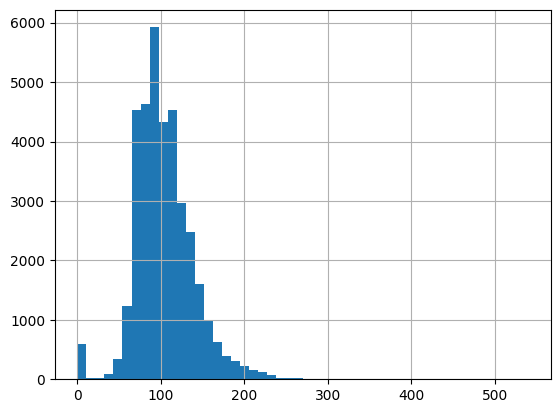

In [11]:
# let's look at the distribution of our columns.

df_exp["avg_price_per_room"].hist(bins=50)
# We see a gaussian distribution with a long tail.

In [22]:
df_exp.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [32]:
df_exp.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


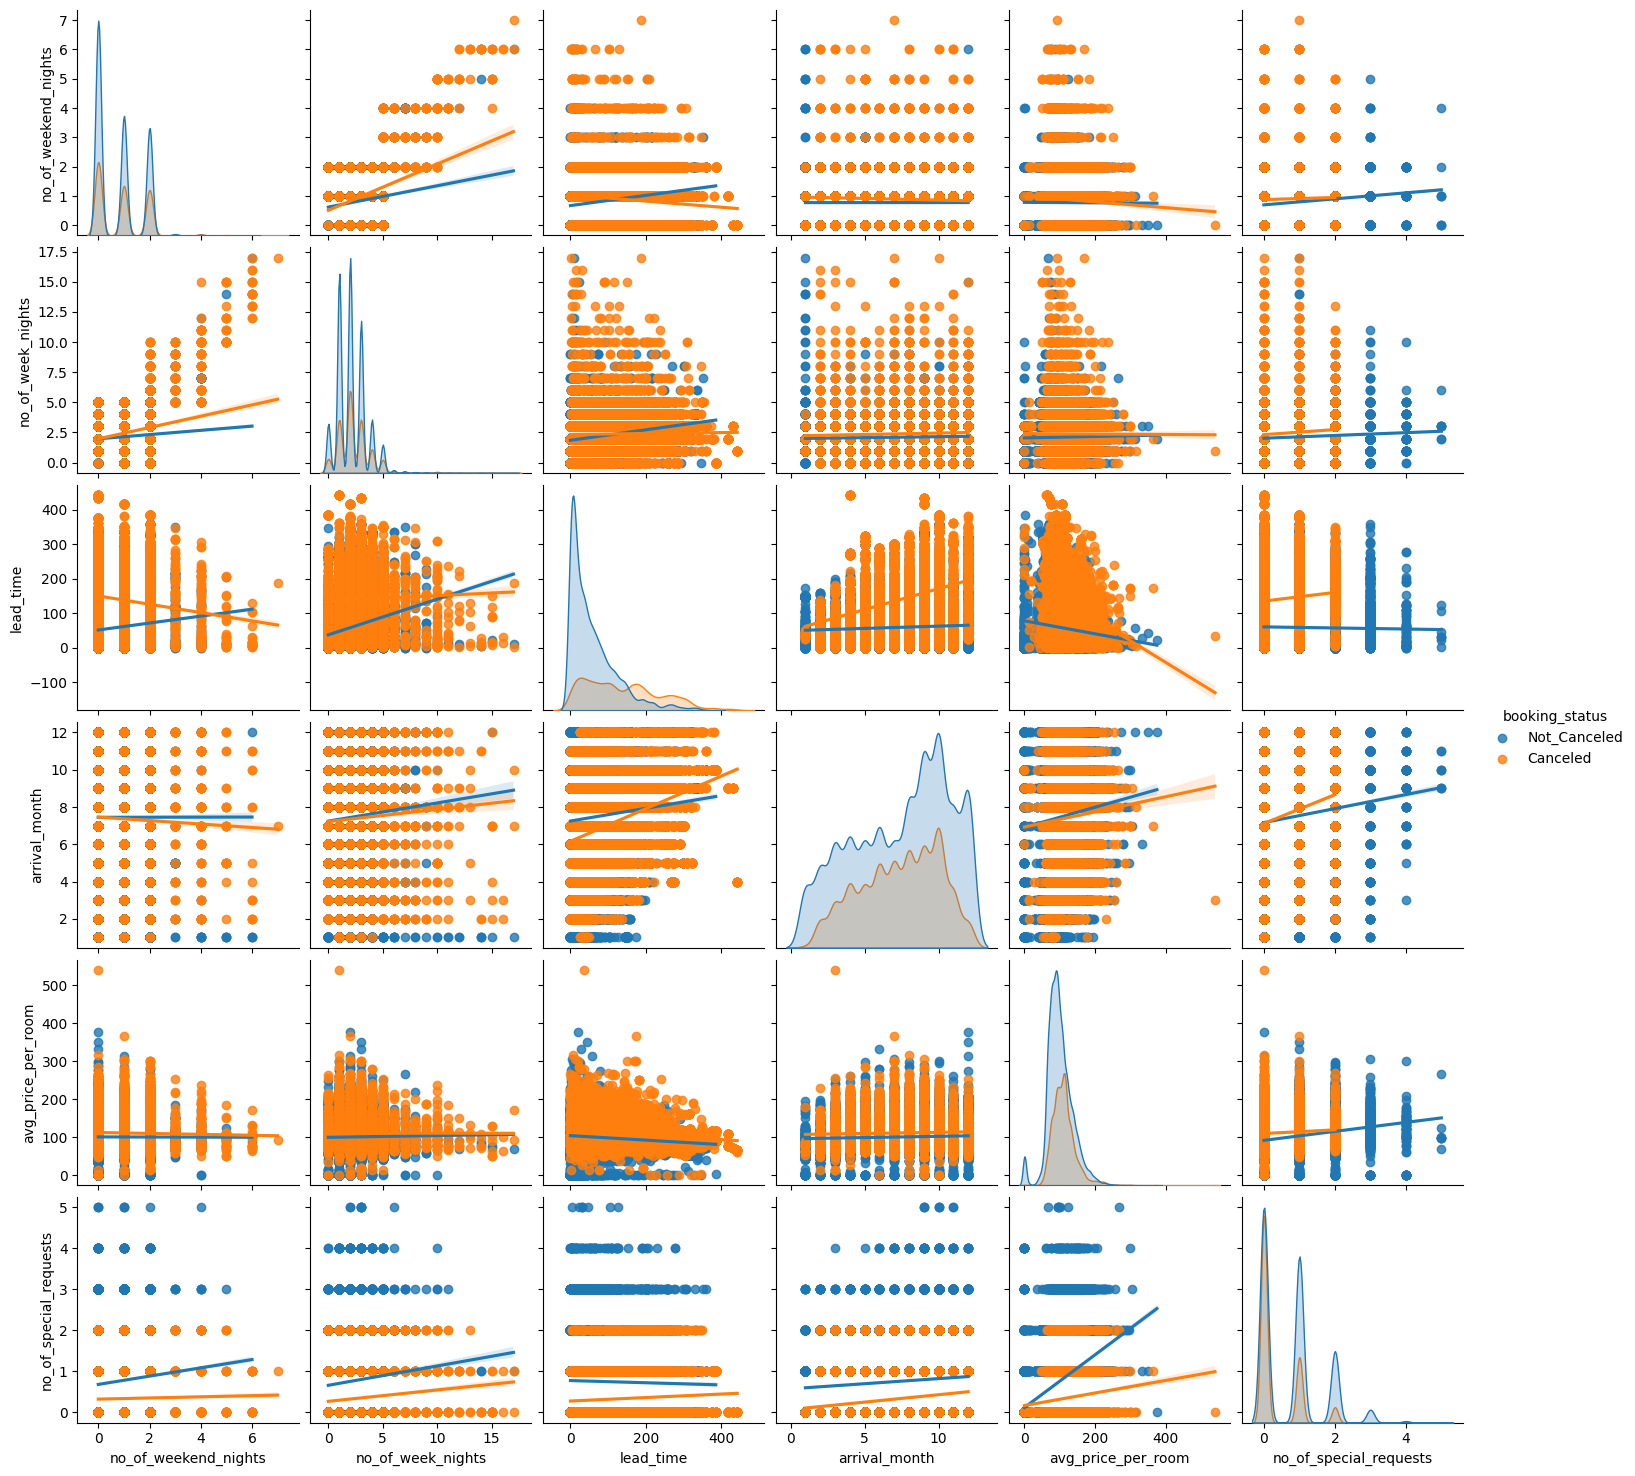

In [34]:
# let's implement a pairplot to see the correlation between the columns. 

sns.pairplot(df_exp[["no_of_weekend_nights",
                     "no_of_week_nights",
                     "lead_time",
                     "arrival_month",
                     "avg_price_per_room",
                     "no_special_requests"
                    ]], kind="reg", diag_kind="kde", hue="booking_status")


In [ ]:
# As we can see the more special geusts from our customers, the more likely they will not cancel the booking.

array([[<AxesSubplot: title={'center': 'no_of_adults'}>,
        <AxesSubplot: title={'center': 'no_of_children'}>,
        <AxesSubplot: title={'center': 'no_of_weekend_nights'}>],
       [<AxesSubplot: title={'center': 'no_of_week_nights'}>,
        <AxesSubplot: title={'center': 'lead_time'}>,
        <AxesSubplot: title={'center': 'arrival_month'}>],
       [<AxesSubplot: title={'center': 'no_of_previous_cancellations'}>,
        <AxesSubplot: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <AxesSubplot: title={'center': 'avg_price_per_room'}>],
       [<AxesSubplot: title={'center': 'no_of_special_requests'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

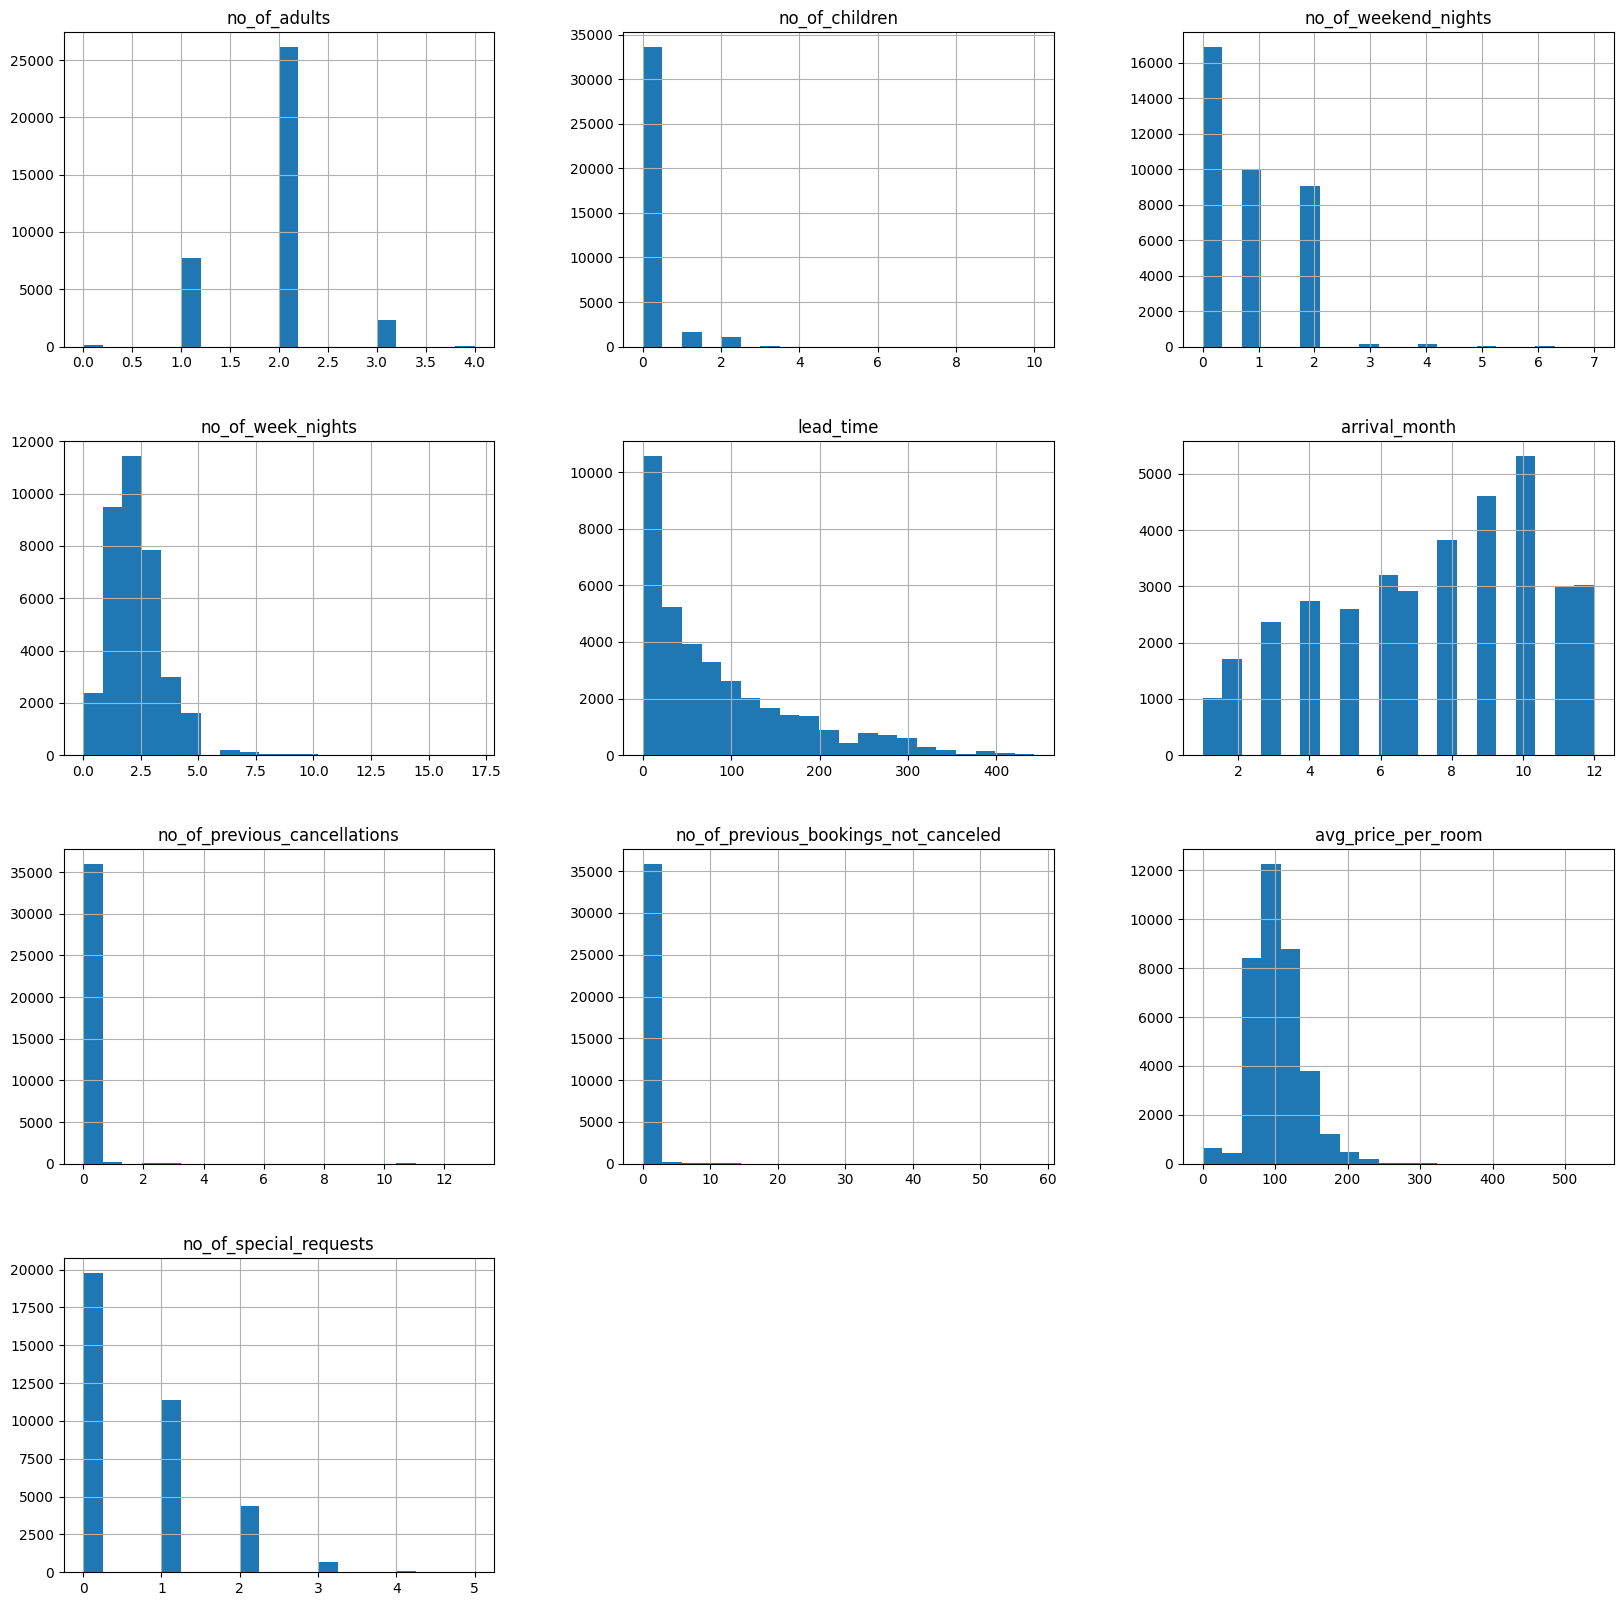

In [20]:
# Let's look at the hist plot of all the columns

df_exp[[
   'no_of_adults', 'no_of_children', 
        'no_of_weekend_nights',
       'no_of_week_nights', 
      #  'type_of_meal_plan', 
    #    'required_car_parking_space',
    #    'room_type_reserved', 
       'lead_time', 
    #    'arrival_year', 
       'arrival_month',
    #    'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
    #    'booking_status'
       ]].hist(figsize=(20,20), bins=20, xlabelsize=10, ylabelsize=10)


As can be seen from graph, we have kind of guassian distribution columns like avg price per person, number of week nights columns, and we have power-law dist(80/20 rule) like lead time column. 

We will be working on those features later.

In [58]:
df_exp.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [59]:
df_exp.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
df_exp['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [12]:
df_exp['booking_status'].value_counts() / len(df_exp) * 100

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [61]:
# 2/3 of our customers don't cancel and 1/3 do.

In [13]:
df_exp.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [36]:
# we have a 0.54 correlation between repeated guests and no_of_previoust_bookings_not_canceled
# this could be useful let's look at further

# let's look at the case where first filter out the repeated guest =1

df_repeated = df_exp[df_exp["repeated_guest"]==1]
df_repeated

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
88,2,0,0,1,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0,5,95.0,0,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
155,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
288,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0,3,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,1,0,1,1,Meal Plan 1,1,Room_Type 1,3,2018,6,20,Corporate,1,0,8,67.0,1,Not_Canceled
36029,1,0,0,3,Meal Plan 1,1,Room_Type 1,5,2018,9,27,Corporate,1,0,3,67.0,1,Not_Canceled
36079,1,0,0,1,Not Selected,1,Room_Type 1,0,2018,1,7,Online,1,11,0,77.5,0,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled


In [37]:
df_repeated.groupby("booking_status").size()

booking_status
Canceled         16
Not_Canceled    914
dtype: int64

In [38]:
16/914*100

1.75054704595186

In [39]:
df_repeated.groupby("no_of_previous_bookings_not_canceled").size()
# let's convert this series object to dataframe.


no_of_previous_bookings_not_canceled
0     118
1     228
2     112
3      80
4      65
5      60
6      36
7      24
8      23
9      19
10     19
11     15
12     12
13      7
14      9
15      8
16      7
17      6
18      6
19      6
20      6
21      6
22      6
23      3
24      3
25      3
26      2
27      3
28      2
29      2
30      2
31      2
32      2
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      2
45      1
46      1
47      1
48      2
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
dtype: int64

In [40]:
count_of_not_canceled = df_repeated.groupby("no_of_previous_bookings_not_canceled").size().to_frame().reset_index().rename(columns={0:"count"})
count_of_not_canceled.head()

,no_of_previous_bookings_not_canceled,count
0,0,118
1,1,228
2,2,112
3,3,80
4,4,65


<AxesSubplot: xlabel='no_of_previous_bookings_not_canceled', ylabel='count'>

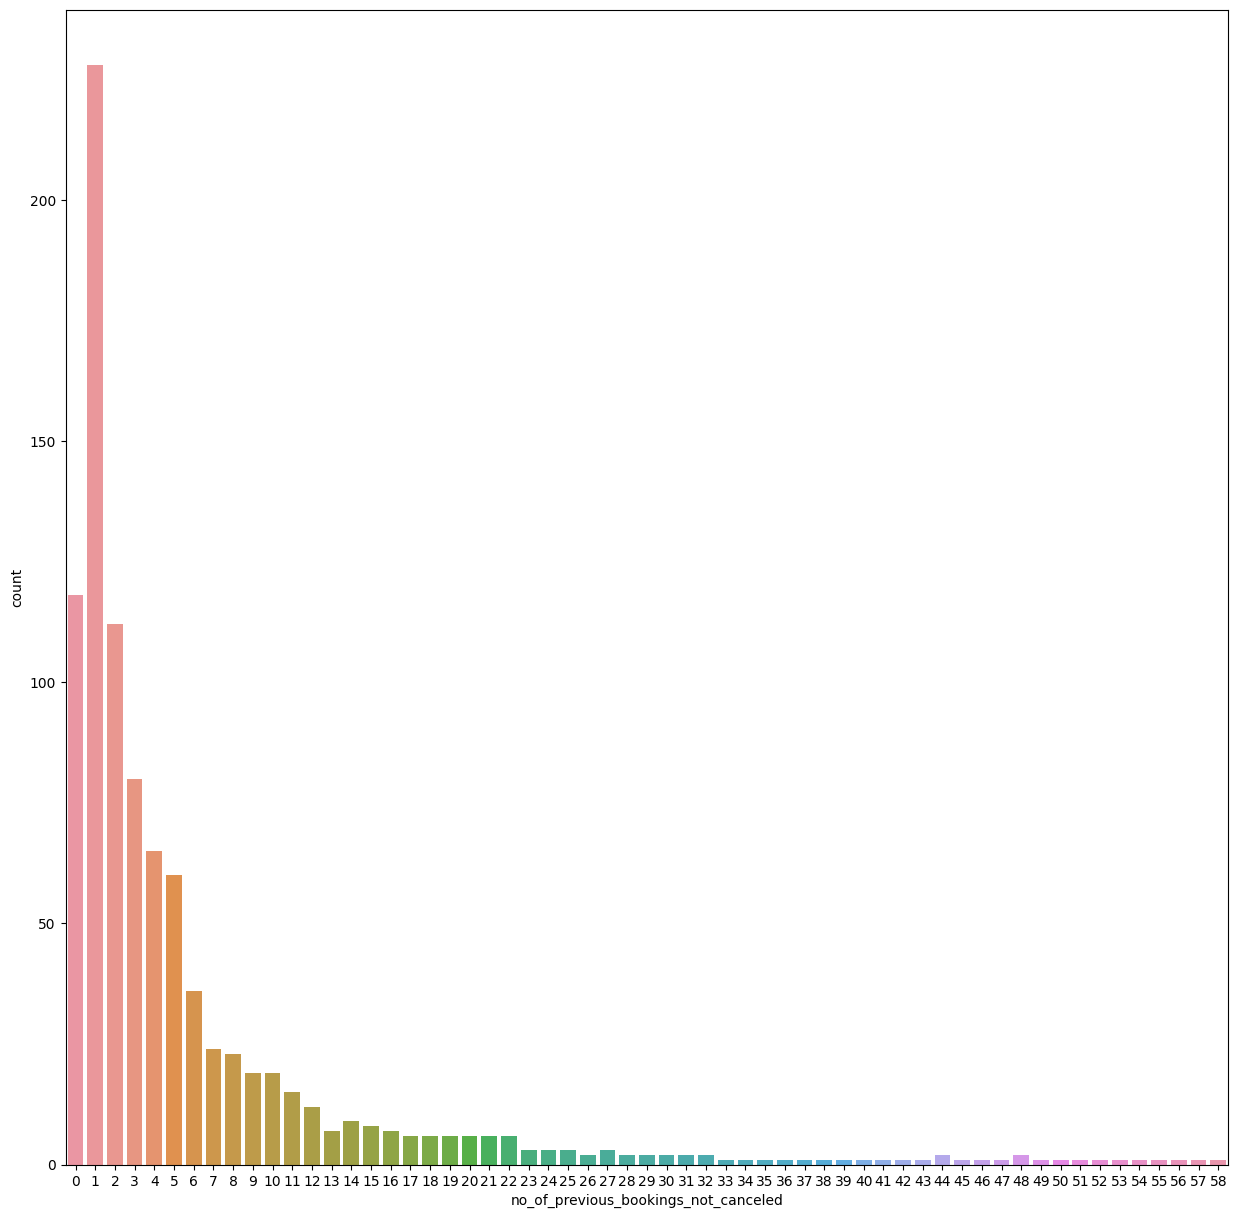

In [41]:
## let's draw a bar plot

plt.figure(figsize=(15,15))
sns.barplot(data=count_of_not_canceled, x="no_of_previous_bookings_not_canceled", y="count")

In [ ]:
# we see that the more the customer has booked in the past, the less likely he is to cancel.

In [44]:
count_of_canceled = df_repeated.groupby("no_of_previous_cancellations").size().to_frame().reset_index().rename(columns={0:"count"})

count_of_canceled.sort_values(by="count", ascending=False)

,no_of_previous_cancellations,count
0,0,592
1,1,198
2,2,46
3,3,43
7,11,25
5,5,11
4,4,10
8,13,4
6,6,1


<AxesSubplot: xlabel='no_of_previous_cancellations', ylabel='count'>

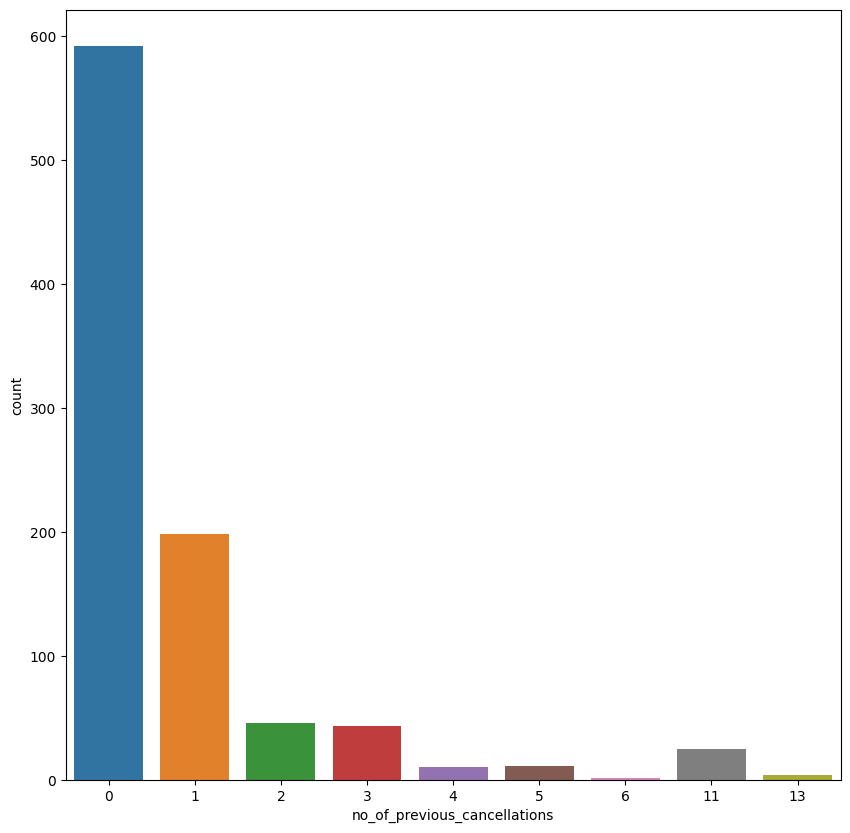

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(data=count_of_canceled, x="no_of_previous_cancellations", y="count")

In [69]:
# repeated guess tend to not cancel

In [32]:
numbers = df_exp.select_dtypes(include=["number"])
numbers

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0


In [29]:
cat = df_exp.select_dtypes(include=['object'])
cat
# Let's look at the categorical variables and how will we encode them

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


In [33]:
cat["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [34]:
df_exp["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [73]:
df_exp.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [74]:
df_exp["arrival_year"].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [75]:
df_exp.groupby(["arrival_year","arrival_month"]).size()

arrival_year  arrival_month
2017          7                 363
              8                1014
              9                1649
              10               1913
              11                647
              12                928
2018          1                1014
              2                1704
              3                2358
              4                2736
              5                2598
              6                3203
              7                2557
              8                2799
              9                2962
              10               3404
              11               2333
              12               2093
dtype: int64

<AxesSubplot: xlabel='arrival_month', ylabel='count'>

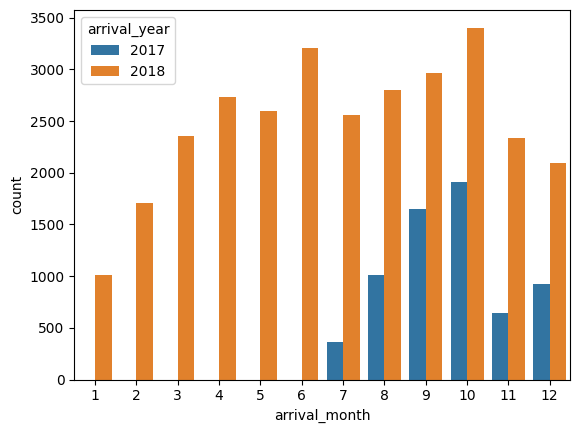

In [76]:
sns.countplot(x="arrival_month", data=df_exp, hue="arrival_year")
# generally there is no strong trend in our month of arrival and also it is hard to say
# a specific trend with 1.5 years of data.

In [77]:
# the range of date is from 2017 7th month to end of 2018

C:\Users\User\AppData\Local\Temp\ipykernel_9272\2224622392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_exp.corr()


<AxesSubplot: >

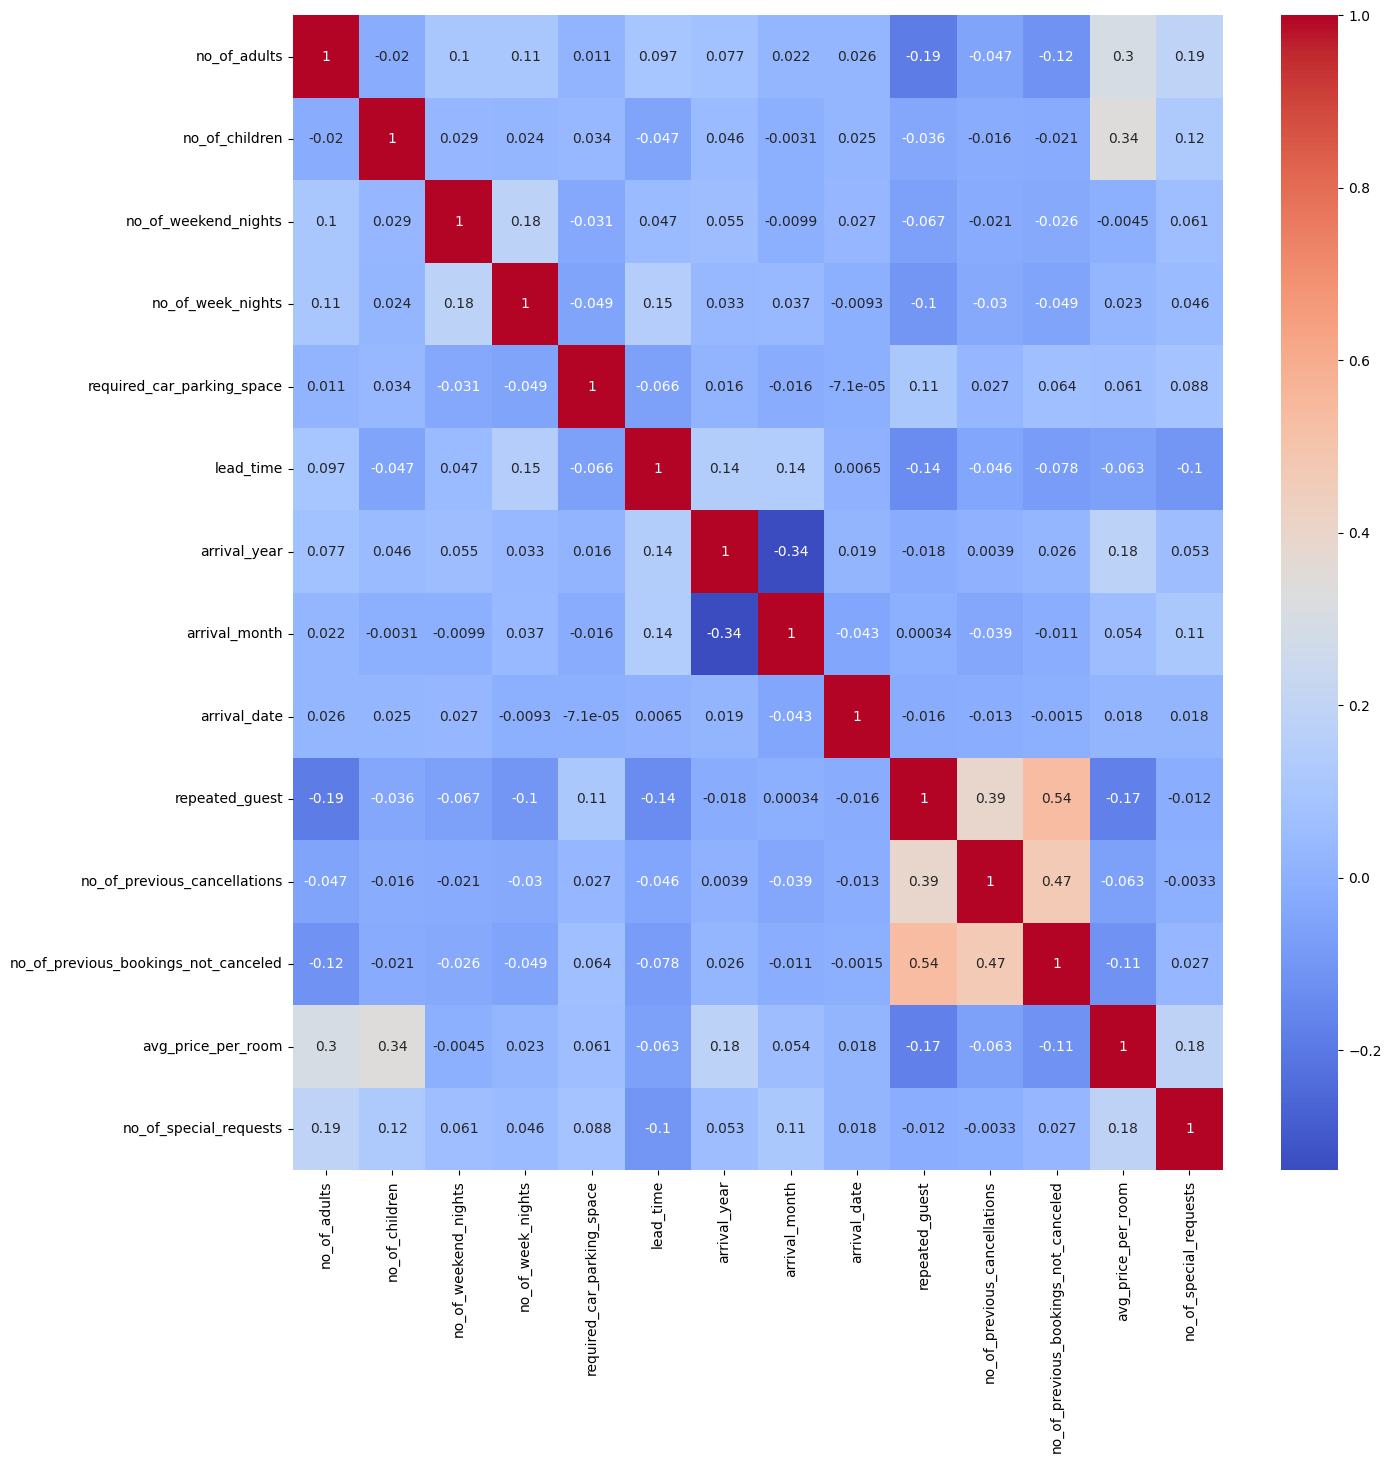

In [135]:
# LEt's make correlation analysis.
corr = df_exp.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

## 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.

### Let's categorize the arrival time into just days like monday, tuesday etc.

In [39]:
df_exp.head()
# 2017-10-02.dayofweek => 0 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-6
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-2-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-5-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-4-11


In [51]:
df_exp["date"] = df_exp["arrival_year"].astype("str") +"-"+ df_exp["arrival_month"].astype("str") + "-"+ df_exp["arrival_date"].astype("str") 
df_exp.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
date                                     object
dtype: object

In [79]:
# there are some problem with our data as we have 2018-02-29 which is not possible
# we will convert those into 2018-02-28

In [47]:
df_exp["date"]

0         2017-10-2
1         2018-11-6
2         2018-2-28
3         2018-5-20
4         2018-4-11
            ...    
36270      2018-8-3
36271    2018-10-17
36272      2018-7-1
36273     2018-4-21
36274    2018-12-30
Name: date, Length: 36275, dtype: object

In [50]:
df_exp[(df_exp["arrival_month"] == 2) & (df_exp["arrival_date"] == 29)] = df_exp[(df_exp["arrival_month"] == 2) & (df_exp["arrival_date"] == 29)].replace(29,28)
df_exp[(df_exp["arrival_month"] == 2) & (df_exp["arrival_date"] == 29)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date


In [52]:
df_exp["date"] = pd.to_datetime(df_exp["date"])

In [45]:
df_exp["date"]

0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2018-04-11
           ...    
36270   2018-08-03
36271   2018-10-17
36272   2018-07-01
36273   2018-04-21
36274   2018-12-30
Name: date, Length: 36275, dtype: datetime64[ns]

In [53]:
df_exp["date"].dt.dayofweek

0        0
1        1
2        2
3        6
4        2
        ..
36270    4
36271    2
36272    6
36273    5
36274    6
Name: date, Length: 36275, dtype: int64

In [54]:
df_exp["dayofweek"]  = df_exp["date"].dt.dayofweek

In [56]:
df_exp["dayofweek"] =  df_exp["dayofweek"].map({0:"Weekday", 
                                                1:"Weekday", 
                                                2:"Weekday", 
                                                3:"Weekday", 
                                                4:"Weekday", 
                                                5:"Weekend", 
                                                6:"Weekend"})

In [57]:
df_exp["dayofweek"].head()

0    Weekday
1    Weekday
2    Weekday
3    Weekend
4    Weekday
Name: dayofweek, dtype: object

In [52]:
df_exp["dayofweek"].value_counts()

Weekdays    24721
Weekend     11554
Name: dayofweek, dtype: int64

In [53]:
df_exp.select_dtypes(include=['object'])

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,dayofweek
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled,Weekdays
1,Not Selected,Room_Type 1,Online,Not_Canceled,Weekdays
2,Meal Plan 1,Room_Type 1,Online,Canceled,Weekdays
3,Meal Plan 1,Room_Type 1,Online,Canceled,Weekend
4,Not Selected,Room_Type 1,Online,Canceled,Weekdays
...,...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled,Weekdays
36271,Meal Plan 1,Room_Type 1,Online,Canceled,Weekdays
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled,Weekend
36273,Not Selected,Room_Type 1,Online,Canceled,Weekend


In [63]:
# we don't need the date column anymore
# let's create the dataframe for the model

df_mdl = df_exp.copy()

In [64]:
df_mdl.drop(["date", "arrival_date", "arrival_month", "arrival_year"], axis=1, inplace=True)

In [65]:
df_mdl.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,dayofweek
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,Weekday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,Weekday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,Weekday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,Weekend
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,Weekday


In [66]:
# let's encode the categorical variables
# let's first start with our label booking_status(binary categorical either 0 or 1)

df_mdl["booking_status"] = df_mdl["booking_status"].apply(lambda a: 1 if a == "Canceled" else 0)

In [67]:
df_mdl["booking_status"].value_counts()

# if canceled, it is 1 else 0

0    24390
1    11885
Name: booking_status, dtype: int64

In [68]:
df_mdl.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,dayofweek
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,0,Weekday
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,0,Weekday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,1,Weekday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,1,Weekend
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,1,Weekday


In [69]:
df_cat = df_mdl.select_dtypes(include=['object'])
df_cat.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,dayofweek
0,Meal Plan 1,Room_Type 1,Offline,Weekday
1,Not Selected,Room_Type 1,Online,Weekday
2,Meal Plan 1,Room_Type 1,Online,Weekday
3,Meal Plan 1,Room_Type 1,Online,Weekend
4,Not Selected,Room_Type 1,Online,Weekday


In [70]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder.fit(df_cat)

OneHotEncoder(handle_unknown='ignore')

In [71]:
encoder.categories_

[array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype=object),
 array(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
        'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online'],
       dtype=object),
 array(['Weekday', 'Weekend'], dtype=object)]

In [72]:
encoder.transform(df_cat).toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [139]:
encoded_cat = pd.DataFrame(encoder.transform(df_cat).toarray(), columns=encoder.get_feature_names_out(), index=df_cat.index)
encoded_cat

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,dayofweek_Weekday,dayofweek_Weekend
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36273,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [140]:
encoded_cat.columns

Index(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'dayofweek_Weekday', 'dayofweek_Weekend'],
      dtype='object')

In [141]:
# in order to see all the columns let's configure a few options
pd.set_option('display.max_columns', None)

In [142]:
df_cat

,type_of_meal_plan,room_type_reserved,market_segment_type,dayofweek
0,Meal Plan 1,Room_Type 1,Offline,Weekday
1,Not Selected,Room_Type 1,Online,Weekday
2,Meal Plan 1,Room_Type 1,Online,Weekday
3,Meal Plan 1,Room_Type 1,Online,Weekend
4,Not Selected,Room_Type 1,Online,Weekday
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Weekday
36271,Meal Plan 1,Room_Type 1,Online,Weekday
36272,Meal Plan 1,Room_Type 1,Online,Weekend
36273,Not Selected,Room_Type 1,Online,Weekend


In [145]:
# let's now create the dataframe for our model

# df_mdl = df_mdl.drop(df_cat.columns, axis=1) # Don't do this more thgan once
pd.concat([df_mdl, encoded_cat], axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,dayofweek_Weekday,dayofweek_Weekend,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,dayofweek_Weekday,dayofweek_Weekend,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,dayofweek_Weekday,dayofweek_Weekend
0,2,0,1,2,0,224,0,0,0,65.00,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0,2,3,0,5,0,0,0,106.68,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,2,1,0,1,0,0,0,60.00,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,0,0,2,0,211,0,0,0,100.00,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,0,1,1,0,48,0,0,0,94.50,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36271,2,0,1,3,0,228,0,0,0,90.95,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36272,2,0,2,6,0,148,0,0,0,98.39,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.

In [144]:
df_mdl = pd.concat([df_mdl, encoded_cat], axis=1)

In [85]:
df_mdl

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,dayofweek_Weekday,dayofweek_Weekend
0,2,0,1,2,0,224,0,0,0,65.00,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0,2,3,0,5,0,0,0,106.68,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,0,2,1,0,1,0,0,0,60.00,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,0,0,2,0,211,0,0,0,100.00,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,0,1,1,0,48,0,0,0,94.50,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36271,2,0,1,3,0,228,0,0,0,90.95,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36272,2,0,2,6,0,148,0,0,0,98.39,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36273,2,0,0,3,0,63,0,0,0,94.50,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [138]:
# let's identify our features columns (X) and our target column(y)
X = df_mdl.drop("booking_status", axis=1)
y = df_mdl["booking_status"]
 

In [129]:
# Let's tackle with outliers and delete them from our dataset.
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X)
y_pred

array([-1,  1, -1, ...,  1,  1,  1])

In [113]:
outlier_indices = np.where(y_pred==-1)[0]
print(outlier_indices)
print("Total number of outliers, ", len(outlier_indices))

[    0     2     3 ... 36253 36257 36265]
Total number of outliers,  2389


In [107]:
# let's remove the outliers

X.drop(outlier_indices, axis=0, inplace=True)
y.drop(outlier_indices, axis=0, inplace=True)

In [108]:
X.shape

(33886, 29)

In [109]:
y.shape

(33886,)

In [110]:
# let's now create the dataframe for our model 

# let's first split the dataframe into X and y
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 5. Explore many different models and shortlist the best ones.
# 6. Fine-tune your models and combine them into a great solution.

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space
param_distributions = {
    'max_depth': [3, 5, 7, 10, None],           # Maximum depth of the tree
    'min_samples_split': randint(2, 20),        # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),         # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],     # Maximum number of features to consider at each split
    'criterion': ['gini', 'entropy']            # Splitting criterion
}

# Create a decision tree classifier
dt_model = DecisionTreeClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    dt_model, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 5}
Best Score:  0.8560280102810186


In [114]:
# let's measure this with cross_val_score

from sklearn.model_selection import cross_val_score

dt_model_cross = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, 
                                  min_samples_leaf=5, min_samples_split=14)

accuracy_dtree = cross_val_score(dt_model_cross, X_train, y_train, cv=10, scoring="accuracy")
accuracy_dtree

##

# 9 subset of training data 
# 1 subset of test data 


array([0.85438091, 0.86055121, 0.86466475, 0.85232415, 0.85473251,
       0.87160494, 0.84938272, 0.85843621, 0.8600823 , 0.86213992])

In [124]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, 
                                  min_samples_leaf=5, min_samples_split=14)
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.8599660198515604

In [115]:
pd.Series(accuracy_dtree).describe()

count    10.000000
mean      0.858830
std       0.006507
min       0.849383
25%       0.854469
50%       0.859259
75%       0.861743
max       0.871605
dtype: float64

In [124]:
# it seems decision tree is performing with very low std and high mean
# It generelized well

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space to search over
param_dist = {'n_estimators': randint(10, 100),
              'max_depth': [None, 5, 10, 20],
              'max_features': ['sqrt', 'log2', 0.5],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'bootstrap': [True, False]}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Create a RandomizedSearchCV object and fit it to the data
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50,
                                   cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 85}
Best score: 0.8789589224753034


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features=0.5,
                             min_samples_leaf=4, min_samples_split=5, n_estimators=85)

rfc_cross = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy")

pd.Series(rfc_cross).describe()

count    10.000000
mean      0.881954
std       0.005670
min       0.874505
25%       0.877657
50%       0.881498
75%       0.886454
max       0.890749
dtype: float64

In [123]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=None, max_features=0.5,
                             min_samples_leaf=4, min_samples_split=5, n_estimators=85)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8847357596351605

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space to search over
param_dist = {'n_estimators': randint(10, 100),
              'max_depth': [None, 3, 5, 7],
              'max_features': ['sqrt', 'log2', 0.5],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 10),
              'learning_rate': [0.001, 0.01, 0.1, 1],
              'subsample': [0.5, 0.7, 1.0]}

# Create a GradientBoostingClassifier object
gbc = GradientBoostingClassifier()

# Create a RandomizedSearchCV object and fit it to the data
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=50,
                                   cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 79, 'subsample': 1.0}
Best score: 0.8762721052534568


In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier(n_estimators=79,
                                 learning_rate=0.1, 
                                 max_depth=None, 
                                 max_features="log2", 
                                 min_samples_leaf=9, 
                                 min_samples_split=6, 
                                 subsample=1)

gbc_cross = cross_val_score(gbc, X_train, y_train, cv=10, scoring="accuracy")
pd.Series(gbc_cross).describe()

count    10.000000
mean      0.876889
std       0.007534
min       0.863496
25%       0.872619
50%       0.876432
75%       0.880520
max       0.890308
dtype: float64

In [122]:
gbc = GradientBoostingClassifier(n_estimators=79,
                                 learning_rate=0.1, 
                                 max_depth=None, 
                                 max_features="log2", 
                                 min_samples_leaf=9, 
                                 min_samples_split=6, 
                                 subsample=1)
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8808012161316283

In [119]:
# So far GradientBoostingClassifier have performed almost same like RandomForestClassifier
# DecisionTreeClassifier is performing slighltly worse than those two models


In [120]:
# However, we also need to take into consideration of the time it takes to predict the data.

In [126]:
# Our final model selection part.
from sklearn.metrics import accuracy_score
import time
time_start = time.time()
gbc_score = accuracy_score(y_test, gbc.predict(X_test))
time_end = time.time()
print("Time taken by GradientBoostingClassifier: ", time_end - time_start)
print("Accuracy score of GradientBoostingClassifier: ", gbc_score)
time_start = time.time()
rfc_score = accuracy_score(y_test, rfc.predict(X_test))
time_end = time.time()
print("Time taken by RandomForestClassifier: ", time_end - time_start)
print("Accuracy score of RandomForestClassifier: ", rfc_score)
time_start = time.time()
dt_score = accuracy_score(y_test, dt_model.predict(X_test))
time_end = time.time()
print("Time taken by DecisionTreeClassifier: ", time_end - time_start)
print("Accuracy score of DecisionTreeClassifier: ", dt_score)


Time taken by GradientBoostingClassifier:  0.16399741172790527
Accuracy score of GradientBoostingClassifier:  0.8808012161316283
Time taken by RandomForestClassifier:  0.3390014171600342
Accuracy score of RandomForestClassifier:  0.8847357596351605
Time taken by DecisionTreeClassifier:  0.010000228881835938
Accuracy score of DecisionTreeClassifier:  0.8599660198515604


In [ ]:
# Even though GradientBoostingClassifier and RandomForestClassifier have larger accuracy score,
# They took more time to predict the data.
# DecisionTreeClassifier is the fastest one and it performs slightly worse than the other two models.
# So, I will choose DecisionTreeClassifier as my final model.